# PyTorch Workkflow

Let's explore a an example PyTorch ent-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [32]:
import torch
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
from pathlib import Path
# Check PyTorch Version
import os
torch.__version__

'2.4.0'

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting al together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting al together'}

## Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA 
* Text


Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula. 

We'll use a linear regression formula to make a staright line with *known* **parameters**.

In [2]:
# Create *known* parameters

weight= 0.7
bias = 0.3

# Create

start = 0                                                                                
end =1
step= 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias              

X[:10] , y[:10] , len(X) , len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.


In [4]:
# Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[ :train_split], y[ :train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is ehere the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [7]:
def plot_predictions(train_data=X_train,train_labels= y_train,test_data = X_test,test_labels= y_test,predictions= None):

    """
    Plots traini0ng data, test data and compares predictions
    """

    plt.figure(figsize = (10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels,c = 'b', s=4, label= 'Training Data')

    # Plot test data in green
    plt.scatter(test_data,test_labels,c= 'g', s=4,label='Testing Data')

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    # Show the legend 
    plt.legend(prop={"size":14});



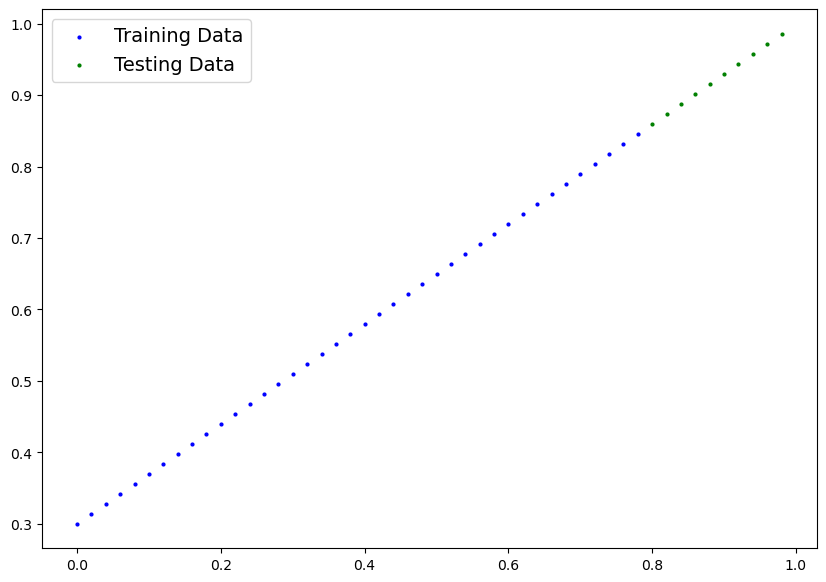

In [6]:
plot_predictions();

In [8]:
# Create linear regression model class

class LinearRregressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))      

    #Forward method to define the computation in the model
    def forward(self,x:torch.Tensor) ->torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, the will help with gradient descent 
* dev forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

In [9]:
torch.manual_seed(42 )
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.  

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this a subclass of nn.Module)
model_0 = LinearRregressionModel()

# Check out the paramters.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`


To check our model's predictive power, let's see hgow well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through `forward()` method. 

https://twitter.com/PyTorch/status/1437838231505096708 

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [14]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
"""
# You can also do something similar with torch.no_grad(), however, infrence_mode() is preferred
with torch.no_grad():
    y_preds = model_0(X_test)
"""
y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

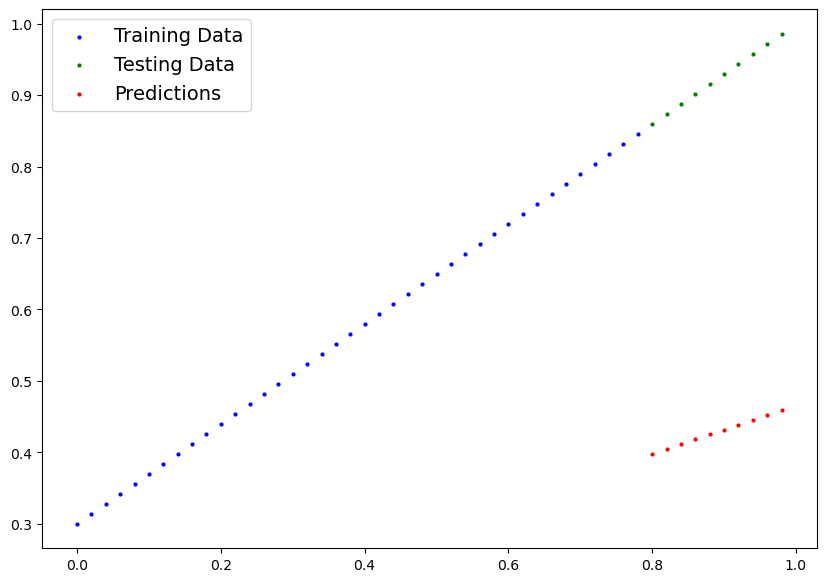

In [16]:
plot_predictions(predictions=y_preds)

## 3. Training Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *knwon* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case,  we're going to refer to it as a loss function.

Thing we need to train: 

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better - https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve loss function. - https://pytorch.org/docs/stable/optim.html#module-torch.optim
    * Inside the optimizer you'll often have to set two parameters:
    
        * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in small changes, a large `lr` results in large changes)


And specifically for PyTorch, we need 
* A training loop
* A testing loop 

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)  # lr = learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use?

**A:** This will be rpoblem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=Ilg3gGewQ5U)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**-https://www.youtube.com/watch?v=IHZwWFHWa-w)


In [20]:
torch.manual_seed(42)

# An eopch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Trakck different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# Pass the data through the model for a number of epochs (e.g. 1)
# 0. Loop through the data 
for epoch in range (epochs):
    # Set the model to training mode
    model_0.train() #train mode in PyTorch sets all parameters that require gradients to require

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on loss with respect to parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration o f the loop

    ### Testing
    model_0.eval()  # turns off different settings in the model not needed for evaluation/testing (droput/batch norm layers) 
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    #with torch.no_grad(): # You may also see torch.no_grad() in older PyTorch code 
        # 1. Do the forward pass 
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)
    
    # Print out what's happenin
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

    # Print out model state_dict()
    print(model_0.state_dict())
    

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Loss: 0.3013603389263153
Epoch: 1 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
Loss: 0.28983935713768005
Epoch: 2 | Loss: 0.28983935713768005 | Test loss: 0.4541231691837311
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
Loss: 0.2783183455467224
Epoch: 3 | Loss: 0.2783183455467224 | Test loss: 0.44065219163894653
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
Loss: 0.26679736375808716
Epoch: 4 | Loss: 0.26679736375808716 | Test loss: 0.4271811842918396
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
Loss: 0.2552763521671295
Epoch: 5 | Loss: 0.2552763521671295 | Test loss: 0.41371020674705505
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
Loss: 0.24375534057

In [20]:
np.array(loss_values,test_loss_values)

TypeError: Field elements must be 2- or 3-tuples, got 'tensor(0.4811)'

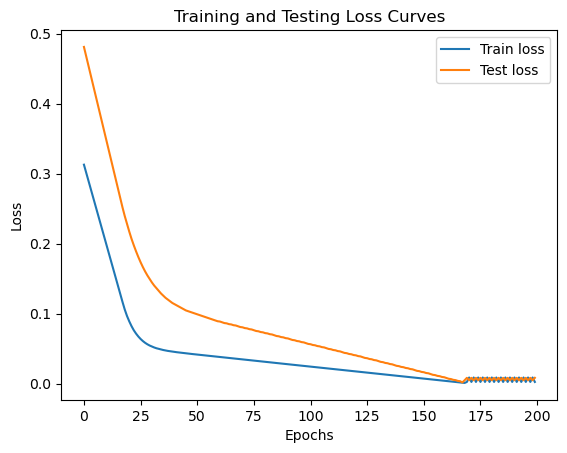

In [21]:
# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label='Train loss')
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()), label ='Test loss')
plt.title('Training and Testing Loss Curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
with torch.inference_mode():
    y_preds_new= model_0(X_test)

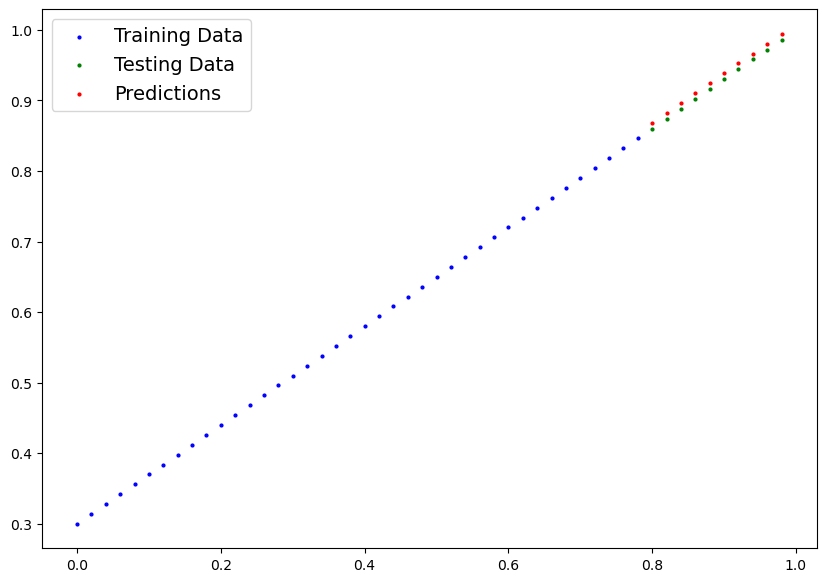

In [23]:
plot_predictions(predictions=y_preds_new)

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Saving a Model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch. 

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format - https://docs.python.org/3/library/pickle.html
2. `torch.load()` - allow you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allow to load a model's saved state dictionary

PyTorch save & load code tutorial  + extra curriculum: https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [26]:
 # Saving our PyTorch model

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH =  MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3.Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_0.pth


In [39]:
os.listdir('models')

['01_pytorch_workflow_0.pth']

## Loading a PyTorch model

Since we saved our model's `state_dict` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [44]:
# To load in a saved state_Dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRregressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\Caner\AppData\Local\Temp\ipykernel_51940\1851134341.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

<All keys matched successfully>

In [45]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [46]:
# Make Some Predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [48]:
# Compare loaded model preds with original preds 
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together 

Let's go back through the steps above and see it all in one place

Creaste device=agnostic code.

This means if we've got acces to a GPU, our code will use it (for potentially faster computing)

If no GPU available, the code will default to using CPU.

In [3]:
# Setup device-agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [4]:
# Create some data using the linear regression formula of y =weight * X + bias

weight = 0.7
bias = 0.3

# Createa range values 
start =0
end = 1 
step = 0.02

# Create X and y (features and labels)
X= torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, erros will pop up
y= weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Split data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

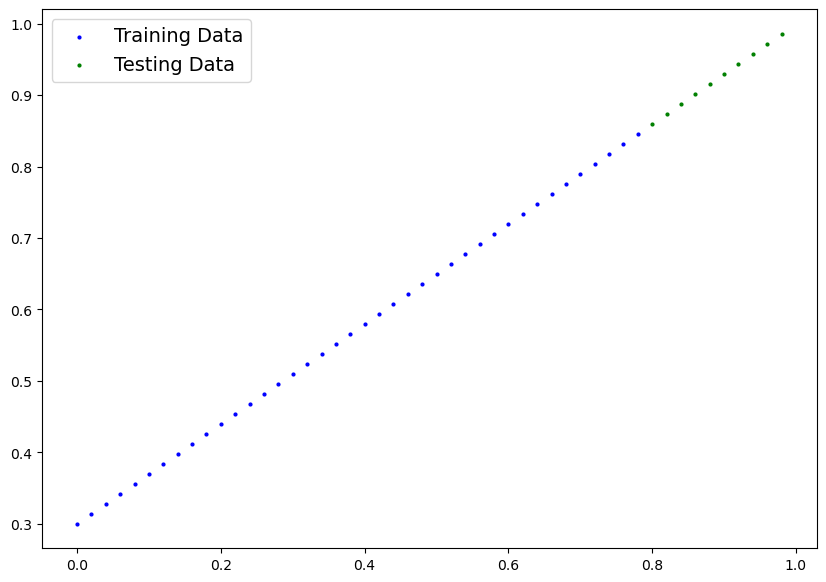

In [8]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded,this will error
plot_predictions(X_train, y_train,X_test,y_test)

### 6.2 Building a PyTorch Linear model


https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [2]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model paramteters  / also called : linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [11]:
# Check the model current device 
next(model_1.parameters()).device

device(type='cpu')

In [15]:
# Set the model to use the target device 
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [16]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [18]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test= X_test.to(device)
y_test = y_test.to(device)


for epoch in range (epochs):
    model_1.train()

    # 1. Forward pass
    y_pred= model_1(X_train)

    # 2. Calculate the loos
    loss = loss_fn(y_pred,y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred,y_test)

    # Print out what's happening
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 1 | Loss: 0.5436570048332214 | Test loss: 0.560505211353302
Epoch: 2 | Loss: 0.5321359634399414 | Test loss: 0.5470342636108398
Epoch: 3 | Loss: 0.5206149816513062 | Test loss: 0.5335632562637329
Epoch: 4 | Loss: 0.5090939998626709 | Test loss: 0.5200923085212708
Epoch: 5 | Loss: 0.49757298827171326 | Test loss: 0.5066213011741638
Epoch: 6 | Loss: 0.4860520362854004 | Test loss: 0.4931503236293793
Epoch: 7 | Loss: 0.47453102469444275 | Test loss: 0.4796793460845947
Epoch: 8 | Loss: 0.4630100429058075 | Test loss: 0.4662083685398102
Epoch: 9 | Loss: 0.45148906111717224 | Test loss: 0.45273739099502563
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 11 | Loss: 0.42844706773757935 | Test loss: 0.42579540610313416
Epoch: 12 | Loss: 0.4169261157512665 | Test loss: 0.4123244285583496
Epoch: 13 | Loss: 0.4054051339626312 | Test loss: 0.39885345101356506
Epoch: 14 | Loss: 0.3938841223716736 | 

In [19]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4  Making and evaluating predictions

In [29]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds  

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

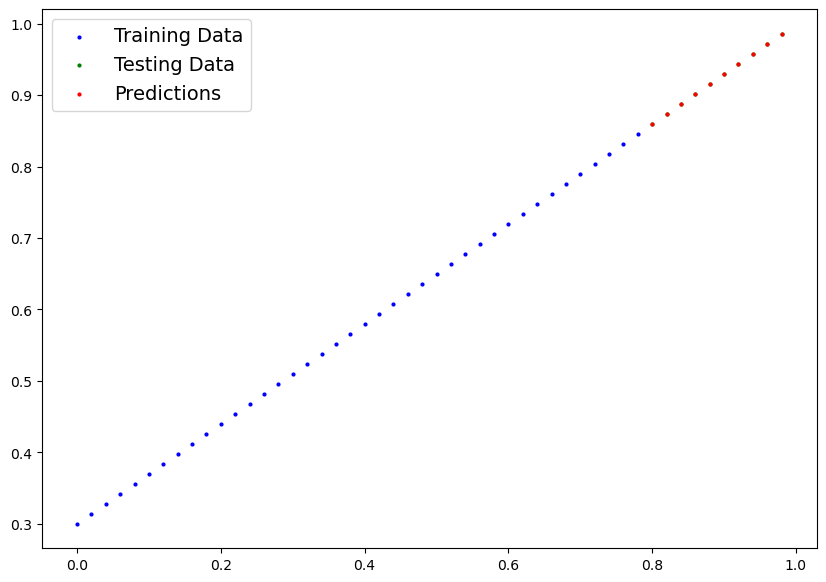

In [31]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [35]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents='True',exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model1.pth


In [36]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device 
loaded_model_1.to(device)

C:\Users\Caner\AppData\Local\Temp\ipykernel_105352\3169137261.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [37]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [38]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [39]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds== y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

### Exercises & Extra=Curriculum

For exercise & extra-curriculum, refer to:https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum
